In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

import bt_mle_utils as mle
from simulation_utils import *

## island

In [2]:
ni = 50
no = 5
k = 3
A = get_island_adj(ni, no, k)

In [3]:
A.shape

(140, 140)

In [4]:
ni * k - no * (k - 1)

140

In [5]:
def get_game_matrix_island(ni, no, k, L, beta):
    n = len(beta)
    game_matrix = np.zeros((n,n))
    A = get_island_adj(ni, no, k)
    
    edge_list = get_edge(A)
    for edge in edge_list:
        i, j = edge
        total = L
        pij = np.exp(beta[i] - beta[j]) / (1 + np.exp(beta[i] - beta[j]))
        nij = np.random.binomial(n = total, p = pij, size = 1)
        game_matrix[i,j], game_matrix[j,i] = nij, total - nij
    return game_matrix

def get_edge(A, list = True):
    '''
    edge indices in the upper-triangle
    '''
    edge = np.where(np.triu(A))
    if list:
        return [(x,y) for x, y in zip(edge[0],edge[1])]
    else:
        return zip(edge[0], edge[1])

In [6]:
def get_beta(n):
    t = 0.9
    kappa = np.log(t / (1 - t))
    delta = 1
    beta = get_beta_with_gap(n, delta)
    beta *= kappa / (np.max(beta) - np.min(beta))
    return beta

def get_mle_island_additivity(game_matrix, ni, no, k):
    n = ni * k - no * (k - 1)
    beta_hat_list = np.zeros((k,ni))
    
    for i in range(k):
        s = ni * i - no * i
        e = s + ni
        g = game_matrix[s:e, s:e]
        beta_i = get_mle_reg(g)
        beta_hat_list[i] = beta_i
    
    beta_hat = np.zeros(n)
    beta_hat[:ni] = beta_hat_list[0]
    
    diff = 0
    for i in range(1, k):
        s  = ni * i - no * i
        diff += beta_hat_list[i - 1][ni - 1] - beta_hat_list[i][no - 1]
        beta_i = diff + beta_hat_list[i]
        beta_hat[(s + no):(s + ni)] = beta_i[no:ni]
    
    beta_hat = beta_hat - np.mean(beta_hat)
    return beta_hat


def beta_hat_joint(ni, no, k, L = 1):
    n = ni * k - no * (k - 1)
    beta = get_beta(n)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_hat = get_mle_reg(game_matrix) 
    return beta, beta_hat

def beta_hat_additivity(ni, no, k, L = 1):
    n = ni * k - no * (k - 1)
    beta = get_beta(n)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_hat = get_mle_island_additivity(game_matrix, ni, no, k)
    return beta, beta_hat

def beta_compare(ni, no, k, L = 1, random = False):
    n = ni * k - no * (k - 1)
    beta = get_beta(n)
    if random:
        beta = np.random.permutation(beta)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_add = get_mle_island_additivity(game_matrix, ni, no, k)
    beta_joint = get_mle_reg(game_matrix)
    return beta, beta_joint, beta_add

(0.7629035858850624, 2669, 0.2)

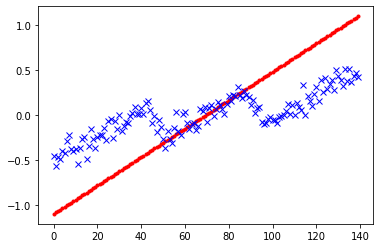

In [7]:
beta, beta_hat = beta_hat_joint(ni = 50, no = 5, k = 3, L = 10)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.2942286872600798, 673, 0.1)

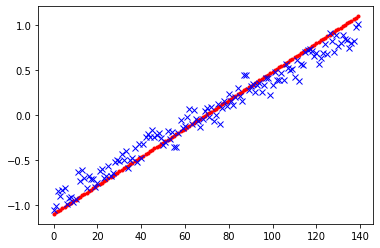

In [8]:
beta, beta_hat = beta_hat_additivity(ni = 50, no = 5, k = 3, L = 10)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.7193135812144953, 13344, 0.3)

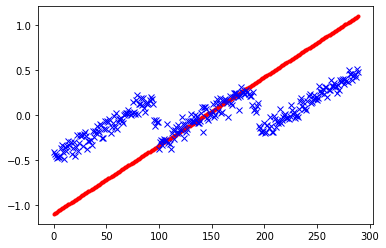

In [9]:
beta, beta_hat = beta_hat_joint(ni = 100, no = 5, k = 3, L = 10)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.2119094090946233, 1913, 0.4)

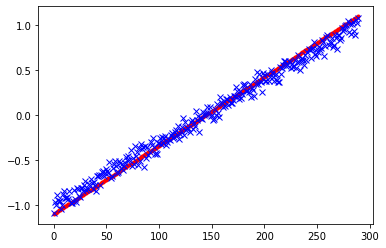

In [10]:
beta, beta_hat = beta_hat_additivity(ni = 100, no = 5, k = 3, L = 10)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

In [13]:
def beta_compare(ni, no, k, L = 1, random = False):
    n = ni * k - no * (k - 1)
    beta = get_beta(n)
    if random:
        beta = np.random.permutation(beta)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_add = get_mle_island_additivity(game_matrix, ni, no, k)
    beta_joint = get_mle_reg(game_matrix)
    return beta, beta_joint, beta_add

add:  (0.3218194522877097, 6804, 0.5)
joint:  (0.29407523640576005, 5634, 0.35)


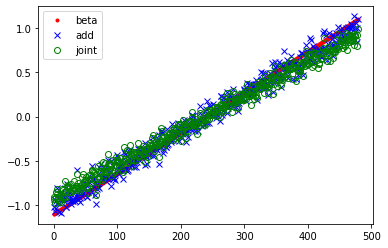

In [14]:
np.random.seed(0)
beta, beta_joint, beta_add = beta_compare(ni = 100, no = 5, k = 5, L = 10, random = True)
ix = np.argsort(beta)
plt.plot(beta[ix], 'r.')
plt.plot(beta_add[ix], 'bx')
plt.plot(beta_joint[ix], 'go',markerfacecolor='none')
plt.legend(['beta','add','joint'])
print('add: ', get_error(beta, beta_add, k = 10))
print('joint: ', get_error(beta, beta_joint, k = 10))

In [54]:
a = np.array([1,5,2])
np.argsort(a)

array([0, 2, 1], dtype=int64)

In [115]:
np.random.seed(0)
L = 10
k = 3

B = 100

ni_list = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100])
no = 5
m = len(ni_list)

l_infty_beta_list = np.zeros(m)
std_l_infty_beta_list = np.zeros(m)
bar_l_infty_beta_list = np.zeros((m,2))
rank_beta_list = np.zeros(m)
topk_beta_list = np.zeros(m)

l_infty_beta_add_list = np.zeros(m)
std_l_infty_beta_add_list = np.zeros(m)
bar_l_infty_beta_add_list = np.zeros((m,2))
rank_beta_add_list = np.zeros(m)
topk_beta_add_list = np.zeros(m)

np.random.seed(0)

for ix, ni in enumerate(ni_list):
    n = ni * k - no * (k - 1)
    
    
    l_infty_beta_, rank_beta_, topk_beta_ = np.zeros(B), np.zeros(B), np.zeros(B)
    l_infty_beta_add_, rank_beta_add_, topk_beta_add_ = np.zeros(B), np.zeros(B), np.zeros(B)
    
    for b in range(B):
        beta = get_beta(n)
        beta = np.random.permutation(beta)
        
        game_matrix = get_game_matrix_island(ni, no, k, L, beta)
        
        beta_hat = get_mle_reg(game_matrix)
        l_infty_beta_[b], rank_beta_[b], topk_beta_[b] = get_error(beta, beta_hat, k = k)
        
        beta_hat = get_mle_island_additivity(game_matrix, ni, no, k)
        l_infty_beta_add_[b], rank_beta_add_[b], topk_beta_add_[b] = get_error(beta, beta_hat, k = k)
        
        
    l_infty_beta_list[ix] = np.mean(l_infty_beta_)
    std_l_infty_beta_list[ix] = np.std(l_infty_beta_)
    bar_l_infty_beta_list[ix, :] = np.quantile(l_infty_beta_, 0.05), np.quantile(l_infty_beta_, 0.95)
    
    rank_beta_list[ix] = np.mean(rank_beta_)
    topk_beta_list[ix] = np.mean(topk_beta_)  
    
    l_infty_beta_add_list[ix] = np.mean(l_infty_beta_add_)
    std_l_infty_beta_add_list[ix] = np.std(l_infty_beta_add_)
    bar_l_infty_beta_add_list[ix, :] = np.quantile(l_infty_beta_add_, 0.05), np.quantile(l_infty_beta_add_, 0.95)
    
    rank_beta_add_list[ix] = np.mean(rank_beta_add_)
    topk_beta_add_list[ix] = np.mean(topk_beta_add_)
    
    print(ni)

20
30
40
50
60
70
80
90
100


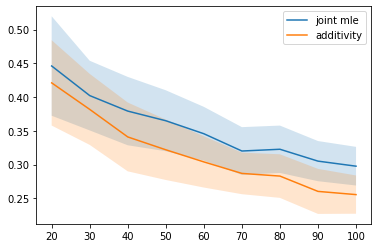

In [116]:
plt.plot(ni_list, l_infty_beta_list)
plt.plot(ni_list, l_infty_beta_add_list)
plt.legend(['joint mle', 'additivity'])

# plt.fill_between(diff_list, bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], color = 'red', alpha = 0.2)
# plt.fill_between(diff_list, bar_l_infty_beta_add_list[:,0], bar_l_infty_beta_add_list[:,1], color = 'blue', alpha = 0.2)
plt.fill_between(ni_list, l_infty_beta_list - std_l_infty_beta_list, 
                 l_infty_beta_list + std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(ni_list, l_infty_beta_add_list - std_l_infty_beta_add_list, 
                 l_infty_beta_add_list + std_l_infty_beta_add_list, alpha = 0.2)

plt.savefig('island_additivity_ni_list' + '_no' + str(no) + '_k' + str(k) + '_L' + str(L) + '.pdf',bbox_inches='tight')

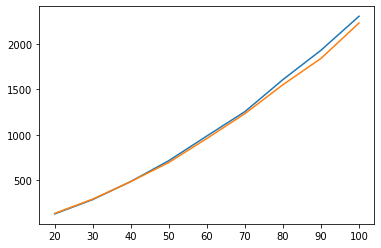

In [117]:
plt.plot(ni_list, rank_beta_list)
plt.plot(ni_list, rank_beta_add_list)

In [118]:
import pickle
with open('island_additivity_ni_list' + '_no' + str(no) + '_k' + str(k) + '_L' + str(L) + '.pickle', 'wb') as f:
    pickle.dump([ni_list, no, k, L, l_infty_beta_list, 
    std_l_infty_beta_list, bar_l_infty_beta_list, rank_beta_list, topk_beta_list, l_infty_beta_add_list, 
    std_l_infty_beta_add_list, bar_l_infty_beta_add_list, rank_beta_add_list, topk_beta_add_list], f)

# Different distribution of beta

In [20]:
def get_beta_overlap(ni, no, k, overlap = 0):
    n = ni * k - no * (k - 1)
    
    t = 0.99
    kappa = np.log(t / (1 - t))
    delta = 1
    beta0 = get_beta_with_gap(n, delta)
    beta0 *= kappa / (np.max(beta0) - np.min(beta0))
    
    shift = (beta0[1] - beta0[0]) * overlap
    beta = np.zeros(n)
    for i in range(k):
        s = ni * i - no * max(0, i - 1)
        e = ni * i - no * i + ni
        beta[s:e] = beta0[s:e].copy() - shift * i
    
    beta -= np.mean(beta)
    return beta

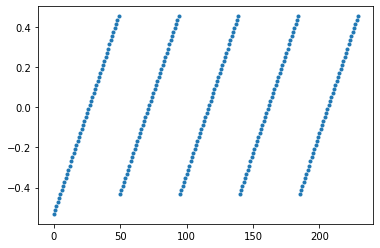

In [21]:
ni, no, k, overlap = 50, 5, 5, 45
beta = get_beta_overlap(ni, no, k, overlap)
plt.plot(beta, '.')

In [22]:
def beta_hat_joint_overlap(ni, no, k, L = 1, overlap = 0):
    n = ni * k - no * (k - 1)
    beta = get_beta_overlap(ni, no, k, overlap)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_hat = get_mle_reg(game_matrix) 
    return beta, beta_hat

def beta_hat_additivity_overlap(ni, no, k, L = 1, overlap = 0):
    n = ni * k - no * (k - 1)
    beta = get_beta_overlap(ni, no, k, overlap)

    game_matrix = get_game_matrix_island(ni, no, k, L, beta)
    beta_hat = get_mle_island_additivity(game_matrix, ni, no, k)
    return beta, beta_hat

(1.1428325340900667, 11690, 0.2)

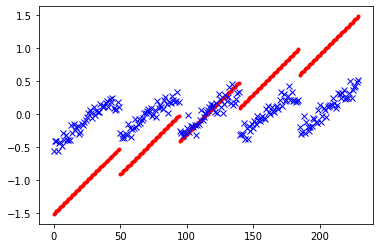

In [23]:
beta, beta_hat = beta_hat_joint_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 20)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.40872548312546275, 1642, 0.2)

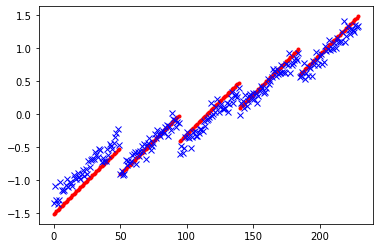

In [24]:
beta, beta_hat = beta_hat_additivity_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 20)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.25436448598846384, 3779, 0.6)

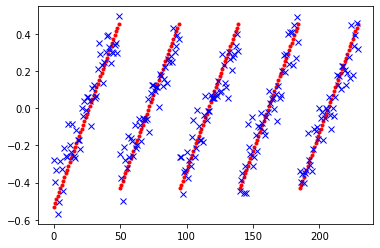

In [25]:
beta, beta_hat = beta_hat_joint_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 45)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.28794460773977615, 4017, 0.2)

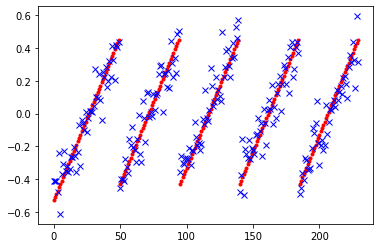

In [26]:
beta, beta_hat = beta_hat_additivity_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 45)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(1.65364910086574, 10523, 0.2)

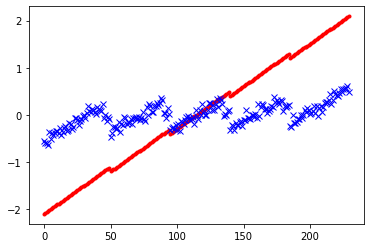

In [27]:
beta, beta_hat = beta_hat_joint_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 5)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.3327424701119516, 884, 0.1)

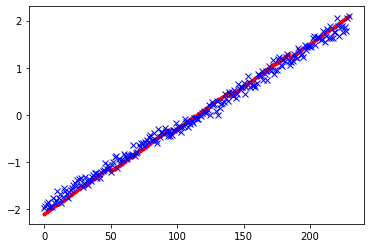

In [28]:
beta, beta_hat = beta_hat_additivity_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 5)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.7204982860348554, 10347, 0.4)

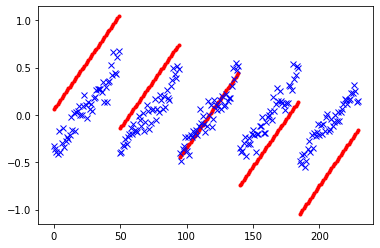

In [29]:
beta, beta_hat = beta_hat_joint_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 60)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

(0.45407269196958056, 3621, 0.35)

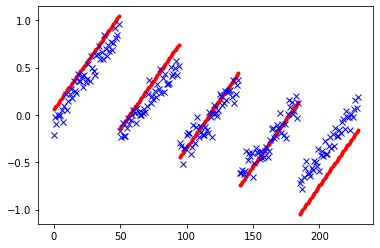

In [30]:
beta, beta_hat = beta_hat_additivity_overlap(ni = 50, no = 5, k = 5, L = 10, overlap = 60)
plt.plot(beta, 'r.')
plt.plot(beta_hat, 'bx')
get_error(beta, beta_hat, k = 10)

In [32]:
import time

In [33]:
factor = 1
ni, no = 50 * factor, 5

L = 10
k = 5

B = 100

overlap_list = np.array([-20, -15, -10, -5, -1, 0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]) * factor
m = len(overlap_list)

l_infty_beta_list = np.zeros(m)
std_l_infty_beta_list = np.zeros(m)
bar_l_infty_beta_list = np.zeros((m,2))
rank_beta_list = np.zeros(m)
topk_beta_list = np.zeros(m)

l_infty_beta_add_list = np.zeros(m)
std_l_infty_beta_add_list = np.zeros(m)
bar_l_infty_beta_add_list = np.zeros((m,2))
rank_beta_add_list = np.zeros(m)
topk_beta_add_list = np.zeros(m)

np.random.seed(0)

for ix, overlap in enumerate(overlap_list):
    st = time.time()

    l_infty_beta_, rank_beta_, topk_beta_ = np.zeros(B), np.zeros(B), np.zeros(B)
    l_infty_beta_add_, rank_beta_add_, topk_beta_add_ = np.zeros(B), np.zeros(B), np.zeros(B)
    
    for b in range(B):
        beta = get_beta_overlap(ni, no, k, overlap)
        game_matrix = get_game_matrix_island(ni, no, k, L, beta)
        
        beta_hat = get_mle_reg(game_matrix)
        l_infty_beta_[b], rank_beta_[b], topk_beta_[b] = get_error(beta, beta_hat, k = k)
        
        beta_hat = get_mle_island_additivity(game_matrix, ni, no, k)
        l_infty_beta_add_[b], rank_beta_add_[b], topk_beta_add_[b] = get_error(beta, beta_hat, k = k)
        
        
    l_infty_beta_list[ix] = np.mean(l_infty_beta_)
    std_l_infty_beta_list[ix] = np.std(l_infty_beta_)
    bar_l_infty_beta_list[ix, :] = np.quantile(l_infty_beta_, 0.05), np.quantile(l_infty_beta_, 0.95)
    
    rank_beta_list[ix] = np.mean(rank_beta_)
    topk_beta_list[ix] = np.mean(topk_beta_)  
    
    l_infty_beta_add_list[ix] = np.mean(l_infty_beta_add_)
    std_l_infty_beta_add_list[ix] = np.std(l_infty_beta_add_)
    bar_l_infty_beta_add_list[ix, :] = np.quantile(l_infty_beta_add_, 0.05), np.quantile(l_infty_beta_add_, 0.95)
    
    rank_beta_add_list[ix] = np.mean(rank_beta_add_)
    topk_beta_add_list[ix] = np.mean(topk_beta_add_)
    
    print(overlap)
    print('time: ', str(time.time() - st))

-20
time:  222.82617688179016
-15
time:  220.35745477676392
-10
time:  219.2145857810974
-5
time:  207.93267560005188
-1
time:  206.7777135372162
0
time:  202.5119342803955
1
time:  204.55322647094727
5
time:  202.28408527374268
10
time:  200.54702591896057
15
time:  198.27797150611877
20
time:  199.58814191818237
25
time:  195.51744747161865
30
time:  190.8105800151825
35
time:  186.81576418876648
40
time:  179.10150051116943
45
time:  152.8637409210205
50
time:  177.68638277053833
55
time:  189.36569619178772
60
time:  197.52789449691772


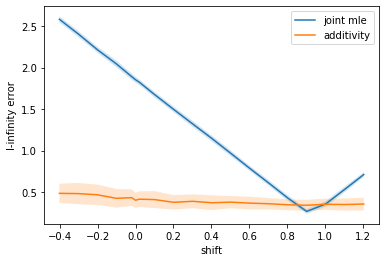

In [34]:
diff_list = (beta[1] - beta[0]) * overlap_list

# plt.figure(figsize = (9, 6))
plt.plot(diff_list, l_infty_beta_list)
plt.plot(diff_list, l_infty_beta_add_list)
plt.legend(['joint mle', 'additivity'])

# plt.fill_between(diff_list, bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], color = 'red', alpha = 0.2)
# plt.fill_between(diff_list, bar_l_infty_beta_add_list[:,0], bar_l_infty_beta_add_list[:,1], color = 'blue', alpha = 0.2)
plt.fill_between(diff_list, l_infty_beta_list - std_l_infty_beta_list, 
                 l_infty_beta_list + std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(diff_list, l_infty_beta_add_list - std_l_infty_beta_add_list, 
                 l_infty_beta_add_list + std_l_infty_beta_add_list, alpha = 0.2)
plt.xlabel('shift')
plt.ylabel('l-infinity error')

plt.savefig('island_additivity_ni' + str(ni) + '_no' + str(no) + '_k' + str(k) + '_L' + str(L) + 'p_up099' + '.pdf',bbox_inches='tight')

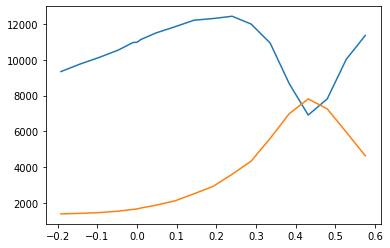

In [123]:
plt.plot(diff_list, rank_beta_list)
plt.plot(diff_list, rank_beta_add_list)

In [127]:
import pickle
with open('island_additivity_ni' + str(ni) + '_no' + str(no) + '_k' + str(k) + '_L' + str(L) + '.pickle', 'wb') as f:
    pickle.dump([ni, no, k, L, overlap_list, l_infty_beta_list, beta, 
    std_l_infty_beta_list, bar_l_infty_beta_list, rank_beta_list, topk_beta_list, l_infty_beta_add_list, 
    std_l_infty_beta_add_list, bar_l_infty_beta_add_list, rank_beta_add_list, topk_beta_add_list], f)